<a href="https://colab.research.google.com/github/wmchen312/TibameML/blob/main/ML0922classification_%E9%81%B8%E6%93%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

常用函式庫
sklearn
tensorflow(較完整),keras
gensim(NLP函式庫)
pandas(表格處理)
matplotlib(作圖)
seaborn(高階作圖)

#latex math語法轉換成容易看的數學符號
$ c = \frac{1}{a + b +\pi }\times {d} $


In [ ]:
#上課範例01
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df=pd.DataFrame(iris["data"],columns=iris["feature_names"])  #pandas的維度函式 DataFrame=>2D, Serise=>1D
#Series:df["sepal length(cm)"]
df["ans"]=iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#進入sklearn以後就不用df, 改用numpy array
import numpy as np
from sklearn.model_selection import train_test_split

y = np.array(df["ans"])
#axis參數
x=np.array(df.drop(["ans"],axis=1))
#train_test_split([1,2,3,4],[5,6,7,8],[9,10,11,12],test_size=0.25) #test_size切幾分, 隨機切, 切相對應位置
#90 % x,10 % x,90 % y,10 % y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
#numpy:.shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


演算法01-決策樹 

gini接近於0

過擬合:不要訓練到最好

後剪枝
前剪枝:max deph
可解釋性: 是否能解釋 ex,pizza好吃程度 0.3*溫度+0.5*濕度+0.8*秒 ->只能知道好不好吃 不能知道如何做. 能分析但不能告訴人類如何
>有步驟性 人類容易懂

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train) #訓練資料fit

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(312.48, 634.1999999999999, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 135\nvalue = [45, 44, 46]\nclass = virginica'),
 Text(156.24, 380.52, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(468.72, 380.52, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 44, 46]\nclass = virginica'),
 Text(312.48, 126.84000000000003, 'gini = 0.153\nsamples = 48\nvalue = [0, 44, 4]\nclass = versicolor'),
 Text(624.96, 126.84000000000003, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]\nclass = virginica')]

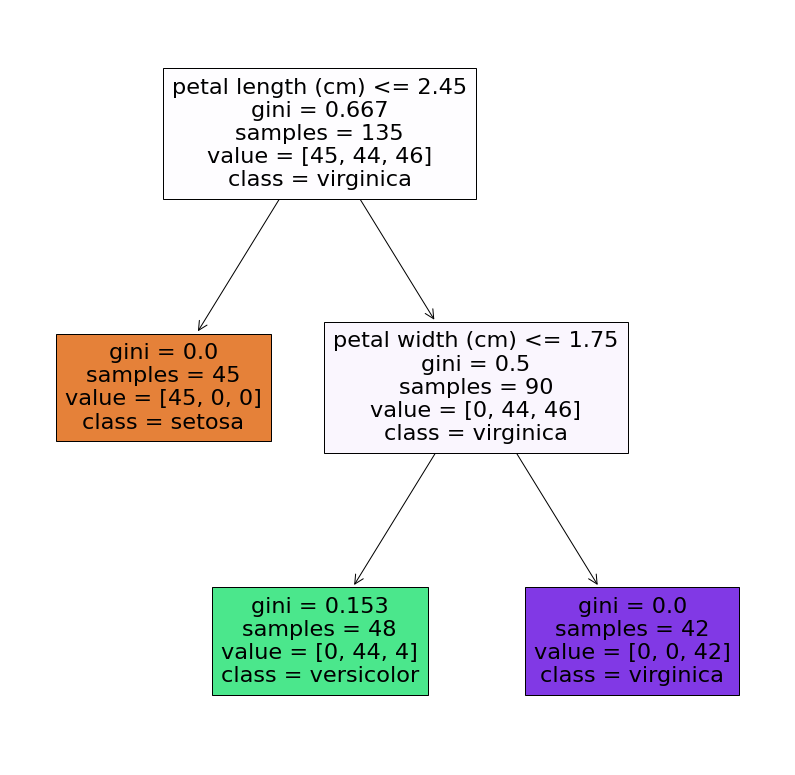

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14)) #畫布大小
plot_tree(clf,
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True)

In [ ]:
#驗證程式是否可執行(得到好的實驗結果)
from sklearn.metrics import accuracy_score #度量標準
pre=clf.predict(x_test) #預測
accuracy_score(pre,y_test) #跑出來的答案是百分比

0.9333333333333333